In [ ]:
# -*- coding: UTF-8 -*-

In [84]:
import numpy as np
import math
import re
import pandas as pd
from bs4 import BeautifulSoup
#from google.colab import drive
#import zipfile
import seaborn as sns
#import spacy as sp
import string
import random
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
from textblob import TextBlob

[nltk_data] Downloading package punkt to /home/pcorrea/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
#.mount("/content/drive")

In [80]:
cols = ['title','reviewId', 'restaurantId','author','reviewBody','language','mobileDevice','userLocation','publicationDate','visitDate','ratingValue','itemReviewed','address','addressLocality','addressRegion','postalCode','country','website','email','phoneNumber','averageRating']
train_data = pd.read_csv('pc-dataset-v2.dat', names= cols, engine = 'python', delimiter=',', skiprows=0 )
train_data.head()

,title,reviewId,restaurantId,author,reviewBody,language,mobileDevice,userLocation,publicationDate,visitDate,...,itemReviewed,address,addressLocality,addressRegion,postalCode,country,website,email,phoneNumber,averageRating
0,Jantar,692856288,2344932,larinhavercosa222,Comida maravilhosa. lugar do verdadeiro chicle...,pt,True,São Carlos. SP,26/07/2019,07/2019,...,Imperador dos Camar\u00F5es,Avenida Doutor Ant\u00F4nio Gouveia,NaN,Alagoas,57030-170,Brasil,http://www.imperadordoscamaroes.com.br,contato@imperadordoscamaroes.com.br,+55 82 3231-4134,4.5
1,Uma boa experi\u00EAncia.,229208487,3720906,Pano P,Comida boa. drinks legais e um ambiente bem ac...,pt,True,Manaus. AM,16/09/2014,None,...,Guacamole Natal,Avenida Praia de Ponta Negra 9068 Ponta Negra,NaN,Rio Grande do Norte,59092-100,Brasil,http://www.facebook.com/GuacamoleNatal,guacamolenatal@gmail.com,+55 84 3219-3646,4.5
2,Otimo self service,679002332,2248105,Magma100,Excelente pra ir com a fam\u00EDlia! \u00D3tim...,pt,True,Goiânia. GO,04/06/2019,07/2018,...,Chica Pitanga,Rua Petrolina 19,Recife,Pernambuco,51021-250,Brasil,http://www.chicapitanga.com.br,chicapitanga@chicapitanga.com.br,+55 81 3334-8260,4.5
3,O sorvete mais tradicional do estado,355671519,8168302,Yurie M,Tomo sorvete na Visabor faz mais de 30 anos. S...,pt,False,Aracaju. SE,15/03/2016,01/2016,...,Sorvetes Vi Sabor,Avenida Francisco Porto 59 Grageru,Aracaju,Sergipe,NaN,Brasil,None,None,None,4.0
4,Melhor hamburger!,268741921,5395141,Debora_C85,O melhor hamburger que j\u00E1 comi! Excelente...,pt,False,Rio de Janeiro. RJ,28/04/2015,04/2015,...,Z Deli Sandwich Shop,Rua Haddock Lobo 1386 Jardins,S\u00E3o Paulo,Estado de S\u00E3o Paulo,01414-002,Brasil,http://www.facebook.com/zdelisandwichshop/,None,551130830021,4.5


In [ ]:
train_data.describe()

In [26]:
train_data.loc[pd.isnull(train_data['reviewBody'])]

,title,reviewId,restaurantId,author,reviewBody,language,mobileDevice,userLocation,publicationDate,visitDate,...,itemReviewed,address,addressLocality,addressRegion,postalCode,country,website,email,phoneNumber,averageRating


In [27]:
train_data.head()

,title,reviewId,restaurantId,author,reviewBody,language,mobileDevice,userLocation,publicationDate,visitDate,...,itemReviewed,address,addressLocality,addressRegion,postalCode,country,website,email,phoneNumber,averageRating
0,Jantar,692856288,2344932,larinhavercosa222,Comida maravilhosa. lugar do verdadeiro chicle...,pt,True,São Carlos. SP,26/07/2019,07/2019,...,Imperador dos Camar\u00F5es,Avenida Doutor Ant\u00F4nio Gouveia,NaN,Alagoas,57030-170,Brasil,http://www.imperadordoscamaroes.com.br,contato@imperadordoscamaroes.com.br,+55 82 3231-4134,4.5
1,Uma boa experi\u00EAncia.,229208487,3720906,Pano P,Comida boa. drinks legais e um ambiente bem ac...,pt,True,Manaus. AM,16/09/2014,None,...,Guacamole Natal,Avenida Praia de Ponta Negra 9068 Ponta Negra,NaN,Rio Grande do Norte,59092-100,Brasil,http://www.facebook.com/GuacamoleNatal,guacamolenatal@gmail.com,+55 84 3219-3646,4.5
2,Otimo self service,679002332,2248105,Magma100,Excelente pra ir com a fam\u00EDlia! \u00D3tim...,pt,True,Goiânia. GO,04/06/2019,07/2018,...,Chica Pitanga,Rua Petrolina 19,Recife,Pernambuco,51021-250,Brasil,http://www.chicapitanga.com.br,chicapitanga@chicapitanga.com.br,+55 81 3334-8260,4.5
3,O sorvete mais tradicional do estado,355671519,8168302,Yurie M,Tomo sorvete na Visabor faz mais de 30 anos. S...,pt,False,Aracaju. SE,15/03/2016,01/2016,...,Sorvetes Vi Sabor,Avenida Francisco Porto 59 Grageru,Aracaju,Sergipe,NaN,Brasil,None,None,None,4.0
4,Melhor hamburger!,268741921,5395141,Debora_C85,O melhor hamburger que j\u00E1 comi! Excelente...,pt,False,Rio de Janeiro. RJ,28/04/2015,04/2015,...,Z Deli Sandwich Shop,Rua Haddock Lobo 1386 Jardins,S\u00E3o Paulo,Estado de S\u00E3o Paulo,01414-002,Brasil,http://www.facebook.com/zdelisandwichshop/,None,551130830021,4.5


In [22]:
train_data.tail()

,title,reviewId,restaurantId,author,reviewBody,language,mobileDevice,userLocation,publicationDate,visitDate,...,itemReviewed,address,addressLocality,addressRegion,postalCode,country,website,email,phoneNumber,averageRating
99995,Nova op\u00E7\u00E3o no Paseo!!!,672210394,17424548,Fabiano B,Ainda n\u00E3o inaugurado oficialmente. est\u0...,pt,True,Porto Alegre. RS,07/05/2019,05/2019,...,Boteco Maestro,Avenida Wenceslau Escobar 1823,Porto Alegre,Rio Grande do Sul,91900-000,Brasil,http://www.facebook.com/botecomaestro,None,+55 51 99353-6602,4.0
99996,Bom,380904400,2440184,Chris L,Bom atendimento. lugar bonito. comida muito go...,pt,True,Cork. Irlanda,08/06/2016,01/2016,...,Casa do Marqu\u00EAs,Rua Marques do Pombal. 1814 Higien\u00F3polis,Porto Alegre,Rio Grande do Sul,90540-000,Brasil,http://galeteriacasadomarques.com.br/,galeteriacasadomarques@galeteriacasadomarques....,+55 51 3343-4303,4.5
99997,Bom bar,186111858,2392996,Guilherme P,O Rio Scenarium \u00E9 uma das baladas mais fa...,pt,False,São Paulo. SP,27/11/2013,11/2013,...,Rio Scenarium,Rua do Lavradio 20 Centro,Rio de Janeiro,Estado do Rio de Janeiro,20230-070,Brasil,http://www.rioscenarium.art.br,None,+55 21-3147-9000,4.5
99998,Me senti enganada...,152745909,1062290,LisianeCohem,Fui por indica\u00E7\u00E3o e com boa expectat...,pt,True,Porto Alegre. RS,21/02/2013,None,...,Celeiro,Rua Dias Ferreira 199,Rio de Janeiro,Estado do Rio de Janeiro,22431-050,Brasil,http://www.celeiroculinaria.com.br,celeiro@celeiroculinaria.com.br,55 21 2274 7843,3.5
99999,Restaurante excelente,649755498,12433911,brunotulio,Experi\u00EAncia fant\u00E1stica com comida de...,pt,True,Manaus. AM,02/02/2019,02/2019,...,Coco Bambu Manaus,Avenida Coronel Teixeira. 5705 Ponta Negra. Sh...,Manaus,Rio Amazonas,69037-000,Brasil,http://www.facebook.com/cocobambumanausoficial/,rh.manaus@cocobambu.com,+55 92 3667-7430,5.0


In [10]:
_train_data = train_data.reviewBody.astype("string")
type(_train_data)
_train_data.

0        Comida maravilhosa. lugar do verdadeiro chicle...
1        Comida boa. drinks legais e um ambiente bem ac...
2        Excelente pra ir com a fam\u00EDlia! \u00D3tim...
3        Tomo sorvete na Visabor faz mais de 30 anos. S...
4        O melhor hamburger que j\u00E1 comi! Excelente...
                               ...                        
99995    Ainda n\u00E3o inaugurado oficialmente. est\u0...
99996    Bom atendimento. lugar bonito. comida muito go...
99997    O Rio Scenarium \u00E9 uma das baladas mais fa...
99998    Fui por indica\u00E7\u00E3o e com boa expectat...
99999    Experi\u00EAncia fant\u00E1stica com comida de...
Name: reviewBody, Length: 100000, dtype: string

In [ ]:
# _blob = TextBlob(_train_data))
# print(_blob.translate(to='en'))

In [34]:
data = train_data
X = data.iloc[1:11,1:5].values # aqui pode ser selecionado a coluna

In [57]:
data = train_data
col_author = data.iloc[:,4:5].values
_data = str(col_author).encode('utf-16', 'surrogatepass')
_data.decode('utf-16')

"[['Comida maravilhosa. lugar do verdadeiro chiclete de camar\\\\u00E3o. \\\\nO gar\\\\u00E7om \\\\u00C9ric Lima nos atendeu muito bem. pretendemos voltar assim que poss\\\\u00EDvel.']\n ['Comida boa. drinks legais e um ambiente bem aconchegante. \\\\nProvamos muitas coisas e tudo nos agradou. Principalmente um pato servido em um dos pratos da casa. sensacional!']\n ['Excelente pra ir com a fam\\\\u00EDlia! \\\\u00D3tima Comida. ambiente agrad\\\\u00E1vel. bom atendimento e estacionamento. Vale a pena conhecer']\n ...\n ['O Rio Scenarium \\\\u00E9 uma das baladas mais famosas do Rio de Janeiro. \\\\u00C9 bem grande e lotada de estrangeiros. A bebida n\\\\u00E3o \\\\u00E9 t\\\\u00E3o cara como em outras cidades. por exemplo. S\\\\u00E3o Paulo. O lado negativo \\\\u00E9 com certeza a fila. Se voc\\\\u00EA n\\\\u00E3o chegar cedo. vai ficar pelo menos 30 minutos esperando para entrar.']\n ['Fui por indica\\\\u00E7\\\\u00E3o e com boa expectativa!\\\\n116.00 o kilo de salada... Bem caro. n

In [50]:
# test = np.array_str(X).encode('utf-16', 'surrogatepass').decode('utf-16')
# serieTest = pd.Series(test)
# print(serieTest)
test = 'Excellent to go with the family! \u00D3tima Comida. pleasant environment. good service and parking. worth knowing'.encode('utf-16').decode('utf-16')
# print(type(test))
print(test)

Excellent to go with the family! Ótima Comida. pleasant environment. good service and parking. worth knowing


In [ ]:
serie =  pd.Series(np.array_str(X))
serie

In [72]:
commentManaus = data.iloc[90901:90905,4:5].values
commentManaus
# blob = TextBlob(serie[0])
# print(blob.translate(to='en'))

array([['Adorei a comida. tudo fresquinho e um tempero maravilhoso. Rod\\u00EDzio bem servido. atendimento nota 10. voltarei com certeza.'],
       ['J\\u00E1 conhe\\u00E7o bem o de Salvador. O de Manaus n\\u00E3o ficou atr\\u00E1s. prato saboroso. ambiente super agrad\\u00E1vel. S\\u00F3 n\\u00E3o coloquei excelente. pois um dos gar\\u00E7ons ao deixar o chopp foi muito est\\u00FApido quando informei que havia pedido sem colarinho. obtendo como resposta que o mesmo iria baixar. Triste. por\\u00E9m inevit\\u00E1vel. acontece!'],
       ['Eu amei. o atendimento \\u00E9 maravilhoso.  atenciosos e legais. E o hamb\\u00FArguer ?! Simplesmente perfeito. o MELHOR. n\\u00E3o tem compara\\u00E7\\u00E3o!!! Eu amei TUDO. J\\u00E1 \\u00E9 um dos meus lugares preferidos. S\\u00E9rio. sem compara\\u00E7\\u00E3o \\uD83D\\uDC97\\uD83D\\uDD25... Um al\\u00F4 pro atendente super atencioso Valter a\\u00ED. obrigadaa!!!'],
       ['lindo o restaurante \\u00E9 todo climatizado.muito lindo e muito sofistic

In [20]:
dic2 = pd.DataFrame(train_data)
dic2['reviewBody']
count = 0
for _x in dic2['reviewBody']:
    count = count + 1  
    print(type(_x))
    x = _x.encode('utf-16', 'surrogatepass').decode('utf-16')
    print(x)
    
    print(count) #vai imprimir todos os reviews= 
        
    comentario_blob = TextBlob(x)
    print(type(comentario_blob))
    comentario_blob_us = comentario_blob.translate(to='us')

    for sentence_br, sentence in zip(comentario_blob.sentences, comentario_blob_us.sentences):
        print(sentence_br, ':', sentence.sentiment.subjectivity)
    if count == 5:
        print('**End**')
        break

<class 'str'>
Comida maravilhosa. lugar do verdadeiro chiclete de camar\u00E3o. \nO gar\u00E7om \u00C9ric Lima nos atendeu muito bem. pretendemos voltar assim que poss\u00EDvel.
1
<class 'textblob.blob.TextBlob'>
Comida maravilhosa. : 1.0
lugar do verdadeiro chiclete de camar\u00E3o. : 0.30000000000000004
\nO gar\u00E7om \u00C9ric Lima nos atendeu muito bem. : 0.3
pretendemos voltar assim que poss\u00EDvel. : 1.0
<class 'str'>
Comida boa. drinks legais e um ambiente bem aconchegante. \nProvamos muitas coisas e tudo nos agradou. Principalmente um pato servido em um dos pratos da casa. sensacional!
2
<class 'textblob.blob.TextBlob'>
Comida boa. : 1.0
drinks legais e um ambiente bem aconchegante. : 0.8125
\nProvamos muitas coisas e tudo nos agradou. : 1.0
Principalmente um pato servido em um dos pratos da casa. : 1.0
sensacional! : 0.6666666666666666
<class 'str'>
Excelente pra ir com a fam\u00EDlia! \u00D3tima Comida. ambiente agrad\u00E1vel. bom atendimento e estacionamento. Vale a pena

In [81]:
_text = 'O melhor hamburger que j\u00E1 comi! Excelente atendimento. a comida estava \u00F3tima. O restaurante \u00E9 bem pequeno. mas agrad\u00E1vel e divertido.'
print(type(_text))
text = _text.encode('utf-16', 'surrogatepass').decode('utf-16')
print('text here: '+ text)
comentario_blob = TextBlob(text)
comentario_blob_us = comentario_blob.translate(to='us')

for sentence_br, sentence in zip(comentario_blob.sentences, comentario_blob_us.sentences):
    print(sentence_br, ':', sentence.sentiment.subjectivity)

<class 'str'>
text here: O melhor hamburger que já comi! Excelente atendimento. a comida estava ótima. O restaurante é bem pequeno. mas agradável e divertido.
O melhor hamburger que já comi! : 0.3
Excelente atendimento. : 1.0
a comida estava ótima. : 0.75
O restaurante é bem pequeno. : 0.4
mas agradável e divertido. : 0.6


In [ ]:
result = []
x = []
for _data in data:
  print(type(_data), _data)
  if _data == 'reviewBody':    
    for x in _data:
      print()
    print(result)

In [ ]:
for x in serie:
  print(x)
  blob = TextBlob(x)
  print(blob.translate(to='en'))

In [ ]:
train_data

In [ ]:
def limparDados(text):
    text = re.sub()
    return text

In [ ]:
X

In [ ]:
_X = np.array_str(X)
print(_X)
#_X.decode('unicode-escape')
X.shape #Formato 

In [ ]:
type(X) # tipo do dado

In [ ]:
data_str = _X[0:10000]
str(data_str).encode('unicode_escape').decode('unicode_escape')

In [ ]:
def decodeUnicodeArray(_string):
    espacoSeq = _string.group(0)
    digito = espacoSeq[2:]
    ordinal = int(digito, 16)
    char = chr(ordinal)
    return char
    

In [ ]:
re.sub(r'(\\u[09A-Fa-f]+)', decodeUnicodeArray, "test")

In [ ]:
train_data.describe()

In [ ]:
#data.drop(['title', 'restaurantId','author','reviewBody','language','userLocation','publicationDate','visitDate','ratingValue','itemReviewed','address','addressLocality','addressRegion','postalCode','country','website','email','phoneNumber','averageRating'], axis = 1, inplace=True)

In [111]:
train_data.mobileDevice.unique()

array([ True, False])

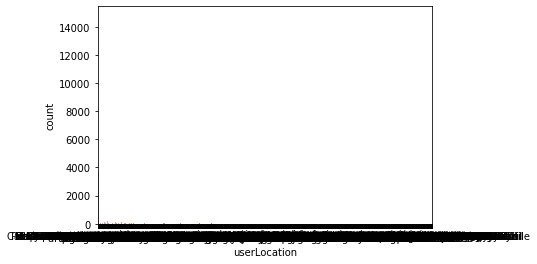

In [112]:
sns.countplot(train_data.userLocation);

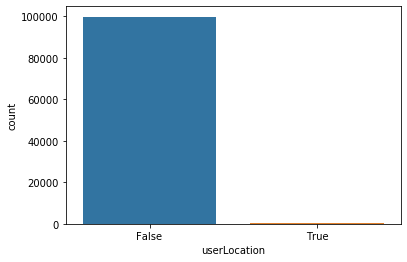

In [116]:
sns.countplot(train_data.userLocation == 'São Paulo');

In [115]:
train_data.loc[train_data.userLocation == 'São Paulo']

,title,reviewId,restaurantId,author,reviewBody,language,mobileDevice,userLocation,publicationDate,visitDate,...,itemReviewed,address,addressLocality,addressRegion,postalCode,country,website,email,phoneNumber,averageRating
58,Muito bom,213209055,2344932,Ivo M,Excelente restaurante.\nExistiam duas unidades...,pt,True,São Paulo,01/07/2014,None,...,Imperador dos Camar\u00F5es,Avenida Doutor Ant\u00F4nio Gouveia,NaN,Alagoas,57030-170,Brasil,http://www.imperadordoscamaroes.com.br,contato@imperadordoscamaroes.com.br,+55 82 3231-4134,4.5
578,Especialista em frangos,293518511,6174992,jorge m,Especialista em frangos. Oferecem v\u00E1rios ...,pt,False,São Paulo,28/07/2015,06/2015,...,Crispy Chicken,Avenida Aricanduva 5555 Jd Sta Terezinha Zona L,S\u00E3o Paulo,Estado de S\u00E3o Paulo,03527-900,Brasil,None,None,None,4.0
612,Pizzaria no centro gastron\u00F4mico do Tatuap...,446688522,7989504,Toshiba2009,Houve um equ\u00EDvoco. e corrigindo minha ava...,pt,False,São Paulo,26/12/2016,12/2016,...,1900 Pizzeria,Rua Itapura 787 Vila Gomes Cardim,S\u00E3o Paulo,Estado de S\u00E3o Paulo,03310-000,Brasil,http://www.1900.com.br/,sac@1900.com.br,+55 11 5904-1347,4.0
872,Comida Arabe por quilo,326984263,5395730,Daisysa,A comida \u00E9 muito boa. por ser por quilo v...,pt,False,São Paulo,15/11/2015,11/2015,...,Kalili Cozinha Arabe,Rua Doutor Albuquerque Lins 686 Alto,S\u00E3o Paulo,Estado de S\u00E3o Paulo,01230-000,Brasil,http://kalilirestaurante.com.br,None,1138038511,4.0
937,Refei\u00E7\u00E3o r\u00E1pida e pr\u00E1tica,178876662,3259765,Fernando R,O Subway em refer\u00EAncia cumpre o que prop\...,pt,False,São Paulo,27/09/2013,09/2013,...,Subway,Avenida \u00C1lvares Cabral. 780. Loja 07. BR ...,Belo Horizonte,Minas Gerais,30140-072,Brasil,None,None,(31) 25145503,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97912,Valor de acordo com o que se \u00E9 oferecido...,464261057,5333719,rogeriovazr,Ayoma. estivemos l\u00E1 esta semana dia 1\u00...,pt,False,São Paulo,03/03/2017,03/2017,...,Aoyama,Rua Bandeira Paulista.520,S\u00E3o Paulo,Estado de S\u00E3o Paulo,04532-011,Brasil,http://www.restauranteaoyama.com.br/,contato@restauranteaoyama.com.br,+55 11 3168-8011,4.0
98287,recomendo,169466863,1635341,Alim J,muito bom atendimento e uma comida deliciosa. ...,pt,False,São Paulo,28/07/2013,12/2012,...,Cabana do Sol,Rua Joao Damasceno 24 A Farol de Sao Marcos,S\u00E3o Lu\u00EDs,Maranh\u00E3o,65077-630,Brasil,http://www.cabanadosol.com.br/content/falecono...,None,98 3235 2586,4.5
98810,Melhor churrascaria de S\u00E3o Paulo,283872155,786437,Eduardo_Barbosa66,Considero a melhor churrascaria de S\u00E3o Pa...,pt,False,São Paulo,29/06/2015,07/2014,...,Fogo De Ch\u00E3o,Av. Santo Amaro 6824 Santo Amaro,S\u00E3o Paulo,Estado de S\u00E3o Paulo,04702-002,Brasil,https://www.facebook.com/fogodechaosantoamaro/,santoamaro@fogodechao.com.br,+55 11 5524-0500,4.5
99479,Comida e atendimento excelentes,230010388,2360313,Gilmar S,Apesar de ficar dentro de uma vila. o ambiente...,pt,False,São Paulo,20/09/2014,09/2014,...,Remanso do Peixe,Travessa Bar\u00E3o do Triunfo 2590 Casa 64 En...,Bel\u00E9m,Par\u00E1,66087-270,Brasil,http://pt-br.facebook.com/RemansoDoPeixe,contato@restauranteremanso.com.br,+55 91 32282477,4.5


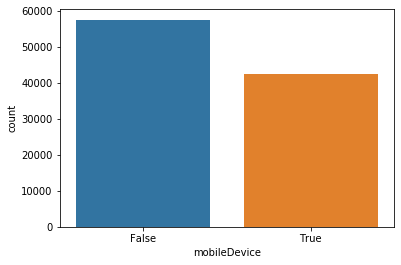

In [85]:
sns.countplot(train_data.mobileDevice);

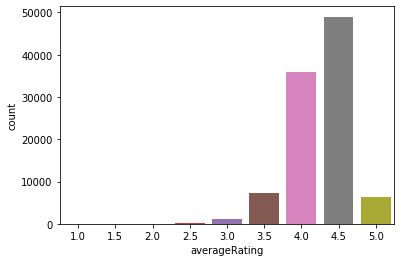

In [88]:
sns.countplot(train_data.averageRating);

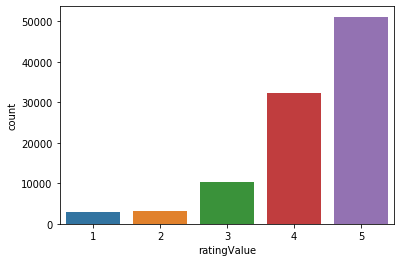

In [105]:
sns.countplot(train_data.ratingValue);

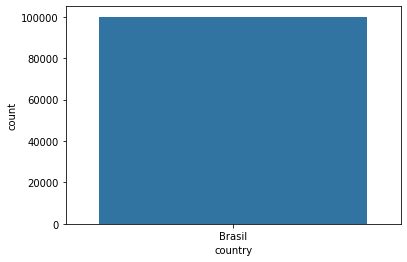

In [109]:
sns.countplot(train_data.country);

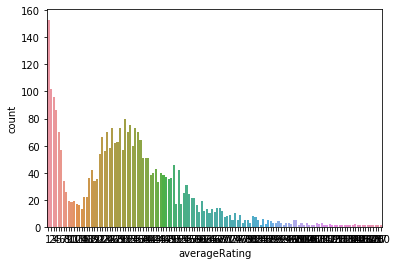

In [108]:
sns.countplot(train_data.groupby('publicationDate').averageRating.count());

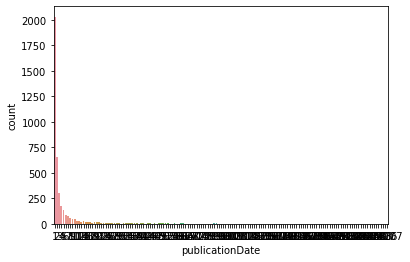

In [119]:
sns.countplot(train_data.groupby('userLocation').publicationDate.count());

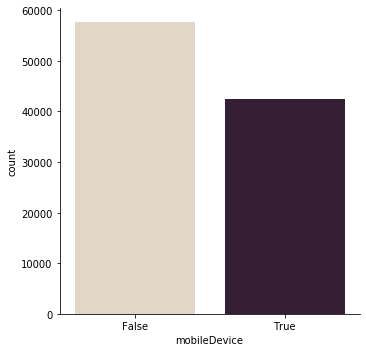

In [89]:
sns.catplot(x="mobileDevice", kind="count", palette="ch:.25", data=train_data)

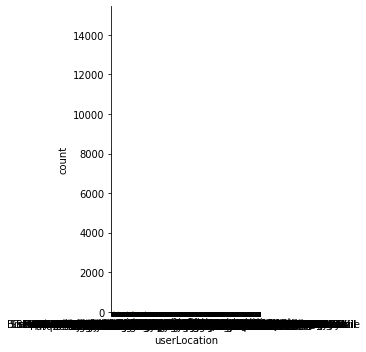

In [110]:
sns.catplot(x="userLocation", kind="count", palette="ch:.25", data=train_data)

In [90]:
%pwd

'/home/pcorrea/Documents/Ciencia-De-Dados-UEA/gitTest'

In [91]:
f1 = (2*66.6*66.6)/(66.6+66.6)

In [92]:
f1

66.6

In [93]:
f2 = (2*60*100)/(60+100)
f2


75.0

In [94]:
f1p = (2*50*50)/(50+50)
f1p

50.0

In [95]:
P = 4/4
R = 4/4
f2p = (2*P*R)/(P+R)
f2p

1.0

In [96]:
#print('Conhe\u00E7o e aprecio comida \u00E1rabe desde muito pequena. Minha av\u00F3 cozinhava divinamente. \nRaras vezes degustei fora de casa sabores t\u00E3o marcantes e harm\u00F4nicos! O ambiente \u00E9 familiar e iluminado. O novo espa\u00E7o ficou incr\u00EDvel. Frequento e Recomendo! \u2764\uFE0F\nParab\u00E9ns.  \uD83D\uDC4F\uD83C\uDFFB\uD83D\uDC4F\uD83C\uDFFB\uD83D\uDC4F\uD83C\uDFFB'.encode('utf-16', 'surrogatepass').decode('utf-16'))
#print(type('Conhe\u00E7o e aprecio comida \u00E1rabe desde muito pequena. Minha av\u00F3 cozinhava divinamente. \nRaras veze'))
# import nltk
# nltk.download('punkt')
# from textblob import TextBlob
#text = 'Conhe\u00E7o e aprecio comida \u00E1rabe desde muito pequena. Minha av\u00F3 cozinhava divinamente. \nRaras vezes degustei fora de casa sabores t\u00E3o marcantes e harm\u00F4nicos! O ambiente \u00E9 familiar e iluminado. O novo espa\u00E7o ficou incr\u00EDvel. Frequento e Recomendo! \u2764\uFE0F\nParab\u00E9ns.  \uD83D\uDC4F\uD83C\uDFFB\uD83D\uDC4F\uD83C\uDFFB\uD83D\uDC4F\uD83C\uDFFB \nFoi muito ruim demais! \n Não irei voltar mais neste lugar'.encode('utf-16', 'surrogatepass').decode('utf-16')
text = 'Sushiloko j\u00E1 foi melhor e mais barato. claro que continua bom. mas os pre\u00E7os dos combos j\u00E1 n\u00E3o est\u00E3o mais em conta'.encode('utf-16', 'surrogatepass').decode('utf-16')

print('text here: '+ text)
comentario_blob = TextBlob(text)
comentario_blob_us = comentario_blob.translate(to='fr')

for sentence_br, sentence in zip(comentario_blob.sentences, comentario_blob_us.sentences):
    print(sentence_br, ':', sentence.sentiment.subjectivity)

text here: Sushiloko já foi melhor e mais barato. claro que continua bom. mas os preços dos combos já não estão mais em conta
Sushiloko já foi melhor e mais barato. : 0.0
claro que continua bom. : 0.0
mas os preços dos combos já não estão mais em conta : 0.0


In [97]:
#['title','reviewId', 'restaurantId','author','reviewBody','language','mobileDevice','userLocation','publicationDate','visitDate','ratingValue','itemReviewed','address','addressLocality','addressRegion','postalCode','country','website','email','phoneNumber','averageRating']

In [98]:
for sentence_br, sentence in zip(comentario_blob.sentences, comentario_blob_us.sentences):
    print(sentence_br, ':', sentence.sentiment.polarity)

Sushiloko já foi melhor e mais barato. : 0.0
claro que continua bom. : 0.0
mas os preços dos combos já não estão mais em conta : 0.0


In [99]:
train_data.groupby('mobileDevice').averageRating.count()

mobileDevice
False    57599
True     42401
Name: averageRating, dtype: int64

In [100]:
train_data.groupby('publicationDate').averageRating.count()

publicationDate
01/01/2013     3
01/01/2014    17
01/01/2015    19
01/01/2016    34
01/01/2017    31
              ..
31/12/2015    52
31/12/2016    17
31/12/2017    24
31/12/2018    17
31/12/2019    18
Name: averageRating, Length: 3106, dtype: int64

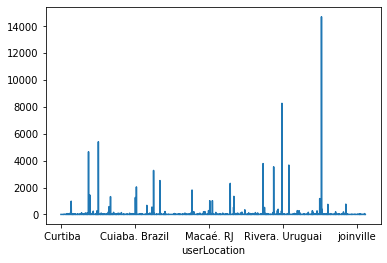

In [101]:
train_data.groupby('userLocation').averageRating.count().plot()

In [102]:
train_data.set_index('userLocation')

,title,reviewId,restaurantId,author,reviewBody,language,mobileDevice,publicationDate,visitDate,ratingValue,itemReviewed,address,addressLocality,addressRegion,postalCode,country,website,email,phoneNumber,averageRating
userLocation,,,,,,,,,,,,,,,,,,,,
São Carlos. SP,Jantar,692856288,2344932,larinhavercosa222,Comida maravilhosa. lugar do verdadeiro chicle...,pt,True,26/07/2019,07/2019,5,Imperador dos Camar\u00F5es,Avenida Doutor Ant\u00F4nio Gouveia,NaN,Alagoas,57030-170,Brasil,http://www.imperadordoscamaroes.com.br,contato@imperadordoscamaroes.com.br,+55 82 3231-4134,4.5
Manaus. AM,Uma boa experi\u00EAncia.,229208487,3720906,Pano P,Comida boa. drinks legais e um ambiente bem ac...,pt,True,16/09/2014,None,4,Guacamole Natal,Avenida Praia de Ponta Negra 9068 Ponta Negra,NaN,Rio Grande do Norte,59092-100,Brasil,http://www.facebook.com/GuacamoleNatal,guacamolenatal@gmail.com,+55 84 3219-3646,4.5
Goiânia. GO,Otimo self service,679002332,2248105,Magma100,Excelente pra ir com a fam\u00EDlia! \u00D3tim...,pt,True,04/06/2019,07/2018,4,Chica Pitanga,Rua Petrolina 19,Recife,Pernambuco,51021-250,Brasil,http://www.chicapitanga.com.br,chicapitanga@chicapitanga.com.br,+55 81 3334-8260,4.5
Aracaju. SE,O sorvete mais tradicional do estado,355671519,8168302,Yurie M,Tomo sorvete na Visabor faz mais de 30 anos. S...,pt,False,15/03/2016,01/2016,5,Sorvetes Vi Sabor,Avenida Francisco Porto 59 Grageru,Aracaju,Sergipe,NaN,Brasil,None,None,None,4.0
Rio de Janeiro. RJ,Melhor hamburger!,268741921,5395141,Debora_C85,O melhor hamburger que j\u00E1 comi! Excelente...,pt,False,28/04/2015,04/2015,5,Z Deli Sandwich Shop,Rua Haddock Lobo 1386 Jardins,S\u00E3o Paulo,Estado de S\u00E3o Paulo,01414-002,Brasil,http://www.facebook.com/zdelisandwichshop/,None,551130830021,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Porto Alegre. RS,Nova op\u00E7\u00E3o no Paseo!!!,672210394,17424548,Fabiano B,Ainda n\u00E3o inaugurado oficialmente. est\u0...,pt,True,07/05/2019,05/2019,5,Boteco Maestro,Avenida Wenceslau Escobar 1823,Porto Alegre,Rio Grande do Sul,91900-000,Brasil,http://www.facebook.com/botecomaestro,None,+55 51 99353-6602,4.0
Cork. Irlanda,Bom,380904400,2440184,Chris L,Bom atendimento. lugar bonito. comida muito go...,pt,True,08/06/2016,01/2016,4,Casa do Marqu\u00EAs,Rua Marques do Pombal. 1814 Higien\u00F3polis,Porto Alegre,Rio Grande do Sul,90540-000,Brasil,http://galeteriacasadomarques.com.br/,galeteriacasadomarques@galeteriacasadomarques....,+55 51 3343-4303,4.5
São Paulo. SP,Bom bar,186111858,2392996,Guilherme P,O Rio Scenarium \u00E9 uma das baladas mais fa...,pt,False,27/11/2013,11/2013,4,Rio Scenarium,Rua do Lavradio 20 Centro,Rio de Janeiro,Estado do Rio de Janeiro,20230-070,Brasil,http://www.rioscenarium.art.br,None,+55 21-3147-9000,4.5


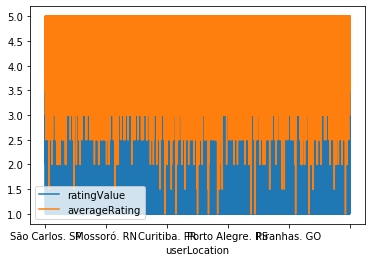

In [103]:
train_data.set_index('userLocation').plot()

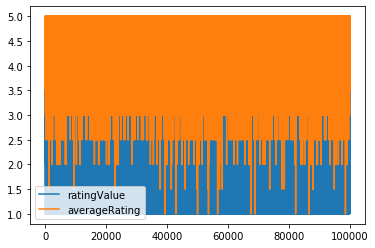

In [104]:
train_data.plot()